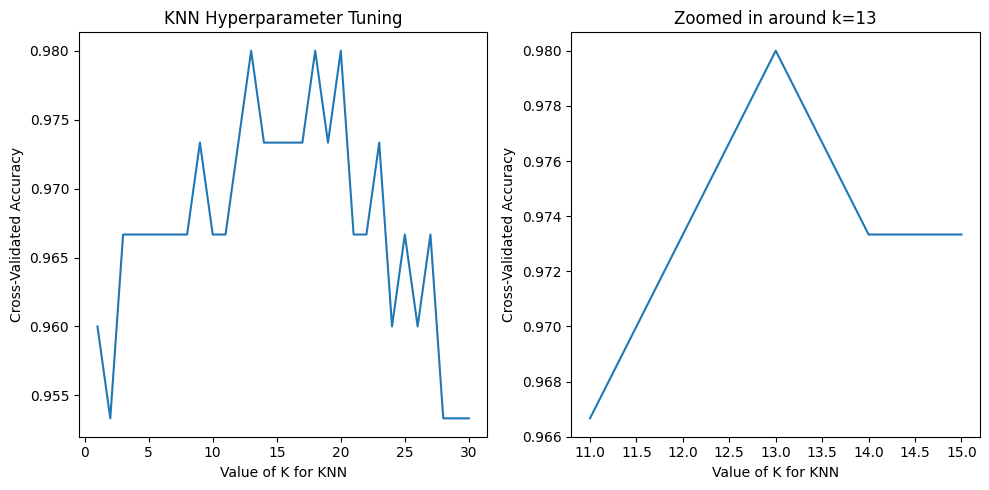

The optimal number of neighbors is 13.


In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier


iris = load_iris()
X = iris.data
y = iris.target


k_range = range(1, 31)
cross_val_scores = []


for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=10)
    cross_val_scores.append(scores.mean())


plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(k_range, cross_val_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.title('KNN Hyperparameter Tuning')


plt.subplot(1, 2, 2)
plt.plot(k_range[10:15], cross_val_scores[10:15])
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.xticks(np.arange(11, 15.1, 0.5))
plt.yticks(np.arange(0.966, 0.981, 0.002))
plt.title('Zoomed in around k=13')

plt.tight_layout()
plt.savefig('knn_plots.jpg')
plt.show()


param_grid = {'n_neighbors': range(1, 31)}
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=10)
grid_search.fit(X, y)


best_k = grid_search.best_params_['n_neighbors']
print(f'The optimal number of neighbors is {best_k}.')
